# Renda de americanos dos Estado Unidos
se a pessoa ganha ou não mais de 50.000 dólares por ano.

In [38]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

# Analisando o dataset

In [39]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
         'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
         'hours-per-week','native-country', 'is_rich']
df = pd.read_csv('adult.data', names=names, na_values='?', sep=',\s+', engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_rich
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


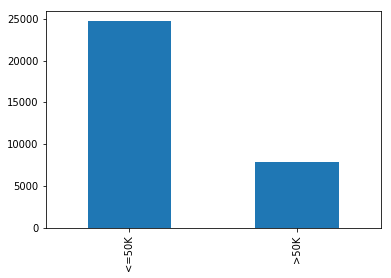

In [40]:
df['is_rich'].value_counts().plot(kind='bar');

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
is_rich           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [42]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
is_rich              0
dtype: int64

In [43]:
df.corr().style.background_gradient(cmap='hot')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1,-0.0766459,0.0365272,0.0776745,0.0577745,0.0687557
fnlwgt,-0.0766459,1,-0.0431946,0.000431886,-0.0102517,-0.0187685
education-num,0.0365272,-0.0431946,1,0.12263,0.079923,0.148123
capital-gain,0.0776745,0.000431886,0.12263,1,-0.0316151,0.0784086
capital-loss,0.0577745,-0.0102517,0.079923,-0.0316151,1,0.0542564
hours-per-week,0.0687557,-0.0187685,0.148123,0.0784086,0.0542564,1


# Prepreprocessando os dados

#### A categoria education é desnecessária, ja que existe a education num que é equivalente!

In [44]:
df = df.drop(labels=['education'], axis=1)
df.head(30)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_rich
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


#### Aplicando o mais frequente para os valores faltantes

In [50]:
from sklearn.impute import SimpleImputer

In [51]:
imputer = SimpleImputer(strategy='most_frequent')

In [53]:
data = imputer.fit_transform(df)

In [55]:
data.dtype

dtype('O')

In [58]:
dfdata = pd.DataFrame(data)

In [60]:
dfdata.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [20]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
is_rich           0
dtype: int64

In [21]:
df.head(30)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_rich
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


#### Transformando as features e labels em valores numéricos

In [69]:
dfdata = pd.get_dummies(df, drop_first=True)
dfdata.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,is_rich_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X = dfdata.values[:, :-1] # converter para float64
y = dfdata.values[:, -1]

In [71]:
X.astype('float64').dtype

dtype('float64')

In [72]:
X.dtype

dtype('int64')

## Criando modelos

In [73]:
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [74]:
models = {}
models['Perceptron'] = {'modelo': Perceptron(max_iter=1000, tol=0.001), 'pred': [], 'acc': -1}
models['SGDClassifier'] = {'modelo': SGDClassifier(max_iter=1000, tol=0.001), 'pred': [], 'acc': -1}
models['LogisticRegression'] = {'modelo': LogisticRegression(solver='lbfgs'), 'pred': [], 'acc': -1}
models['KNeighborsClassifier'] = {'modelo': KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree'), 'pred': [], 'acc': -1}
models['GaussianNB'] = {'modelo': GaussianNB(), 'pred': [], 'acc': -1}
models['SVC'] = {'modelo': SVC(gamma='auto'), 'pred': [], 'acc': -1}
models['DecisionTreeClassifier'] = {'modelo': DecisionTreeClassifier(), 'pred': [], 'acc': -1}

#### Stratfied Cross Validation

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

In [76]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    pipe = Pipeline([('transformer', StandardScaler()), ('estimator', models[model]['modelo'])])
    models[model]['acc'] = np.mean(cross_val_score(pipe, np.float64(X), y, cv=cv, scoring='accuracy'))

In [77]:
pd.DataFrame.from_dict(models, orient='index', columns=['acc']).sort_values('acc', ascending=False)

,acc
LogisticRegression,0.851294
SVC,0.848930
SGDClassifier,0.841559
KNeighborsClassifier,0.825005
DecisionTreeClassifier,0.813550
Perceptron,0.790086
GaussianNB,0.448545


### Logistc Regression obteve o melhor resultado

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y,
                                                    shuffle=True, random_state = 42)

In [80]:
std = StandardScaler()
X_train_std = std.fit_transform(np.float64(X_train))
X_test_std = std.transform(np.float64(X_test))

In [81]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_std, y_train)
lr_pred = lr.predict(X_test_std)
lr_acc = accuracy_score(lr_pred, y_test)
lr_acc

0.8535806411988699

Podemos perceber que mesmo usando o dataset inteiro ele ainda erra mais que usando os subconjuntos do KFold